In [ ]:
import pandas as pd

df = pd.read_excel("/content/process_data.xlsx")
print(df)

      no  Spinbeam_temp  Roller1_speed  Roller2_speed  Roller2_Temp  \
0      1            256           3500           4039            95   
1      2            256           3500           4039            95   
2      3            256           3500           4039            95   
3      4            256           3500           4039            95   
4      5            258           1500           4039            95   
..   ...            ...            ...            ...           ...   
811  812            268           1490           4105           100   
812  813            268           1490           4105           100   
813  814            268           1500           4105           100   
814  815            268           1500           4105           100   
815  816            268           1500           4105           100   

     Draw_ratio  F/R_speed  Tenacity  Elongation  
0         1.154       4000      2.75       59.20  
1         1.154       4000      2.62       59

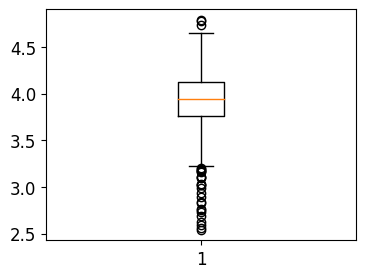

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df.head()

plt.boxplot(df["Tenacity"])
plt.show()

In [ ]:
!pip install pyod

In [ ]:
from pyod.models.cblof import CBLOF   # kNN detector

clf = CBLOF()
# 모든 공정변수 고려한 군집화
clf.fit(df)

CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [ ]:
y_train_pred = clf.labels_
print(y_train_pred)

[1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

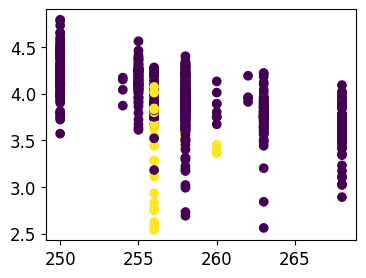

In [ ]:
plt.scatter(df["Spinbeam_temp"],df["Tenacity"],c=y_train_pred,label=y_train_pred)
plt.show()

In [ ]:
# 이상치 개수를 세린다
cnt = 0
for a in y_train_pred:
  if(a == 1):
    cnt = cnt+1
print(cnt)

82


In [ ]:
clf = CBLOF()
# 오로지 Tenacity만 고려한 군집화
clf.fit(df["Tenacity"].values.reshape(-1, 1))
labeled = clf.labels_

In [ ]:
cnt = 0
for a in labeled:
  if(a == 1):
    cnt = cnt+1
print(cnt)

81
